In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [33]:
np.random.seed(0)
n=15
x=np.linspace(0,10,n) + np.random.randn(n)/5
y=np.sin(x)+x/6 + np.random.randn(n)/10
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0)

In [34]:
poly=PolynomialFeatures(2)
x=poly.fit_transform(x_train.reshape(11,1))
x

array([[  1.        ,  10.08877265, 101.78333351],
       [  1.        ,   3.23065446,  10.43712821],
       [  1.        ,   1.62431903,   2.6384123 ],
       [  1.        ,   9.31004929,  86.67701776],
       [  1.        ,   7.17166586,  51.43279117],
       [  1.        ,   4.96972856,  24.69820194],
       [  1.        ,   8.14799756,  66.38986421],
       [  1.        ,   2.59103578,   6.71346643],
       [  1.        ,   0.35281047,   0.12447523],
       [  1.        ,   3.375973  ,  11.39719367],
       [  1.        ,   8.72363612,  76.10182709]])

In [35]:
input_val=[]
result=[]
def Question_01():
    for i in [1,3,6,9]:
        poly=PolynomialFeatures(i)
        x=poly.fit_transform(x_train.reshape(11,1))
        linear = LinearRegression()
        linear.fit(x, y_train)
        inp=np.linspace(0,10,100)
        input_val.append(inp)
        result.append(linear.predict(poly.fit_transform(inp.reshape(100,1))))
Question_01()

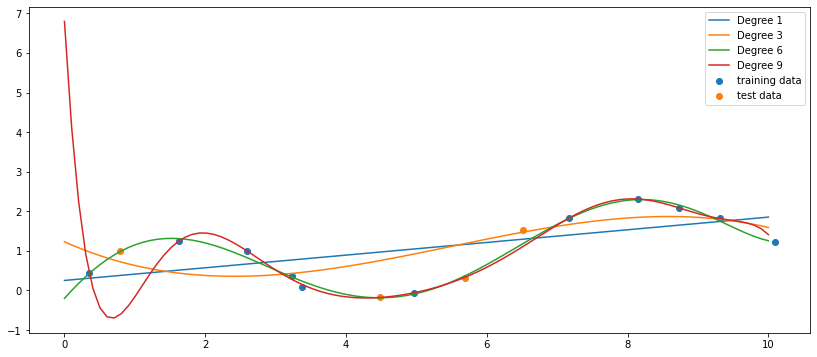

In [36]:
plt.figure(figsize=(14,6))
plt.scatter(x_train, y_train, label='training data')
plt.scatter(x_test, y_test, label='test data')
plt.plot(input_val[0], result[0], label='Degree 1')
plt.plot(input_val[1], result[1], label='Degree 3')
plt.plot(input_val[2], result[2], label='Degree 6')
plt.plot(input_val[3], result[3], label='Degree 9')
plt.legend()

# Question 02

In [78]:
def Question_02():
    predict=[]
    for i in range(10):
        poly=PolynomialFeatures(i)
        x=poly.fit_transform(x_train.reshape(11,1))
        linear = LinearRegression()
        linear.fit(x, y_train)
        y_pred1=linear.predict(x)

        x_tes=poly.fit_transform(x_test.reshape(4,1))
        y_pred2=linear.predict(x_tes)
        predict.append((r2_score(y_train, y_pred1), r2_score(y_test, y_pred2)))
    return predict

predict=Question_02()
predict

[(0.0, -0.4780864173714179),
 (0.4292457781234663, -0.45237104233936676),
 (0.45109980444082465, -0.06856984149916023),
 (0.587199536877985, 0.005331052945739101),
 (0.9194194471769304, 0.7300494281868042),
 (0.975786414306821, 0.8770830091492043),
 (0.9901823324795086, 0.9214093981378233),
 (0.9935250927840401, 0.9202150411626775),
 (0.9963754538774162, 0.6324795007430363),
 (0.9980370625662136, -0.645247772705078)]

# Question 03

In [106]:
data=pd.DataFrame(predict)
data

,0,1
0,0.000000,-0.478086
1,0.429246,-0.452371
2,0.451100,-0.068570
3,0.587200,0.005331
4,0.919419,0.730049
5,0.975786,0.877083
6,0.990182,0.921409
7,0.993525,0.920215
8,0.996375,0.632480
9,0.998037,-0.645248


In [107]:
data['fitting']=np.subtract(data[0],data[1])
data.rename(columns={0:'Training',1:'Testing'},inplace=True)
data=data.reset_index()

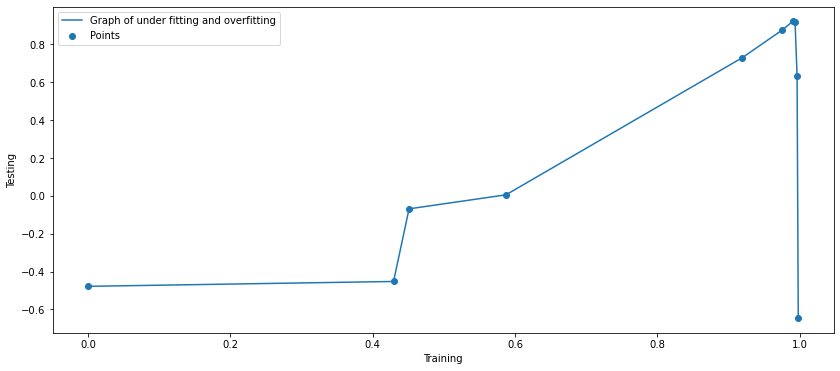

In [122]:
plt.figure(figsize=(14,6))
plt.scatter(data['Training'], data['Testing'] , label='Points')
plt.plot(data['Training'], data['Testing'] , label='Graph of under fitting and overfitting')
plt.xlabel('Training')
plt.ylabel('Testing')
plt.legend()

In [132]:
data

,index,Training,Testing,fitting
9,9,0.998037,-0.645248,1.643285
1,1,0.429246,-0.452371,0.881617
3,3,0.587200,0.005331,0.581868
2,2,0.451100,-0.068570,0.519670
0,0,0.000000,-0.478086,0.478086
8,8,0.996375,0.632480,0.363896
4,4,0.919419,0.730049,0.189370
5,5,0.975786,0.877083,0.098703
7,7,0.993525,0.920215,0.073310
6,6,0.990182,0.921409,0.068773


Overfitting: Good performance on the training data, poor generliazation to other data. 

Underfitting: Poor performance on the training data and poor generalization to other data.

#### Good

In [133]:
data=data.sort_values('fitting')
data.index[0]

6

#### OverFitting 

In [134]:
data=data.sort_values('fitting',ascending=False)
data.index[0]

9

#### UnderFitting

In [143]:
data[data['Training']==data['Training'].min()].index.tolist()

[0]